In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from astropy.io import fits
import numpy  as np
import pandas as pd
import h5py

from tqdm import tqdm
from astropy import units
from astropy import units as u
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
from scipy.signal      import argrelextrema

import ehtplot
import matplotlib as mpl
from matplotlib import pyplot as plt, cm

from scipy import ndimage

plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#    'mathtext.fontset': 'custom',
#    'mathtext.rm': 'Bitstream Vera Sans',
#    'mathtext.it': 'Bitstream Vera Sans:italic',
#    'mathtext.bf': 'Bitstream Vera Sans:bold',   
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
})

from common import dalt
from common import hallmark as hm
from common import viz
from common import io_ipole as io
from common import mockservation as ms

In [2]:
def mkimg(img):
    return dalt.Image(
        ndimage.rotate(img[::-1,:].T, 140, reshape=False),
        4.14e6 * u.Msun, 2.5077305106e+22 * u.cm, 86e9 * u.H, 0, 79.52842452054078 * 200 / 400, 79.52842452054078 * 200 / 400)  

In [3]:
img0 = mkimg(np.load('../temp/best0.npy'))
img1 = mkimg(np.load('../temp/best1.npy'))
img2 = mkimg(np.load('../temp/best2.npy'))
img3 = mkimg(np.load('../temp/best3.npy'))

In [4]:
from astropy import constants as c

nu = 227070703125.0 * u.Hz # input image may have this information
scale = c.c**2 / (2 * c.k_B * nu**2) * u.rad**2
vmax = 15e9

Bbox(x0=0.70625, y0=0.21187500000000004, x1=0.9, y1=0.793125)


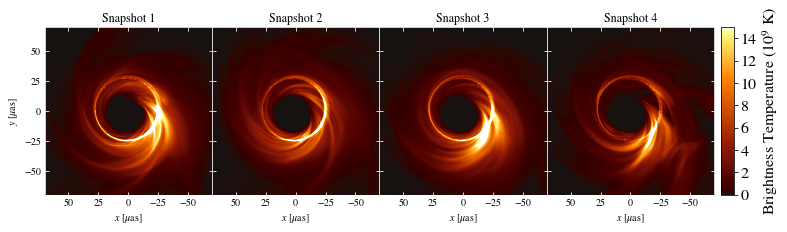

In [6]:
fig, axes = plt.subplots(1,4, figsize=(12,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)

viz.show(img0, f=lambda img: (img * scale).to(u.K), ax=axes[0], cmap='afmhot_10us', vmin=0, vmax=vmax)
viz.show(img1, f=lambda img: (img * scale).to(u.K), ax=axes[1], cmap='afmhot_10us', vmin=0, vmax=vmax)
viz.show(img2, f=lambda img: (img * scale).to(u.K), ax=axes[2], cmap='afmhot_10us', vmin=0, vmax=vmax)
viz.show(img3, f=lambda img: (img * scale).to(u.K), ax=axes[3], cmap='afmhot_10us', vmin=0, vmax=vmax)

for ax in axes:
    ax.set_xlim( 70,-70)
    ax.set_ylim(-70, 70)
    ax.xaxis.set_ticks([50,25,0,-25,-50])
    ax.yaxis.set_ticks([-50,-25,0,25,50])
    ax.tick_params(
        axis='both',
        direction='in',
        top=True,
        right=True,
        color='w',
    )
    for spine in ax.spines.values():
        spine.set_edgecolor('w')
    ax.set_xlabel('$x$ [$\mu$as]')
    ax.set_ylabel(None)
axes[0].set_ylabel('$y$ [$\mu$as]')

axes[0].set_title('Snapshot 1')
axes[1].set_title('Snapshot 2')
axes[2].set_title('Snapshot 3')
axes[3].set_title('Snapshot 4')

pos = axes[3].get_position()
print(pos)

cbaxes = fig.add_axes([pos.x1+0.0075, pos.y0, 0.015, pos.y1-pos.y0])
cbar = fig.colorbar(cm.ScalarMappable(mpl.colors.Normalize(0,15), cmap='afmhot_10us'), ticks=np.arange(0, 15, 2), orientation="vertical", cax=cbaxes)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label="Brightness Temperature ($10^9$ K)", size=16)

fig.savefig('output/bestbet_imgs_frames.pdf', bbox_inches='tight')
#fig.savefig('output/bestbet_imgs.pdf', bbox_inches='tight')